## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)




In [6]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd
from scipy import stats
from scipy.optimize import minimize
import statsmodels.api as sm
import json
import os
s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)



%pylab inline

Populating the interactive namespace from numpy and matplotlib


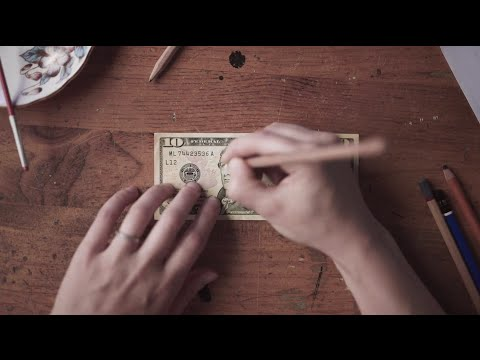

In [7]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 

In [8]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [23]:
#assambling file name from known and variable pieces
#e.g. http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_1.xls
#storing data in 2 dictionaries
allmales={}
allfemales={}
fnamedict = {'all' : 1, 'white' : 4, 'black' : 6, 
             'asian' : 8, 'hispanic' : 9,
             'f' : (allfemales, 3), 'm' : (allmales, 2)}

for k in ['f', 'm']:
    for race in fnamedict:
        if not race == 'f' and not race == 'm':
            print (race)
            fnamedict[k][0][race] = pd.read_excel(url + 
                                        '/pinc08_%d'%fnamedict[k][1] + 
                                        '_1_%d'%fnamedict[race] + 
                                        '.xls', 
                                        header=(9))
        
allfemales.keys(), allmales.keys()

all
white
black
asian
hispanic
all
white
black
asian
hispanic


(dict_keys(['all', 'white', 'black', 'asian', 'hispanic']),
 dict_keys(['all', 'white', 'black', 'asian', 'hispanic']))

In [24]:
col = {'all': 'IndianRed', 'hispanic': 'SteelBlue', 'black': 'blue', 
      'white': 'DarkOrange', 'asian': 'olive'}

In [25]:
# Descriptive phase: 
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### all
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        17383.000000           2971.826087       1010.608696   
std         28945.070201           7604.959824       1190.210877   
min            84.000000              0.000000          6.000000   
25%           666.250000            136.000000         71.250000   
50%          3769.500000            773.500000        585.000000   
75%         23899.750000           1655.500000       1309.000000   
max        109956.000000          38367.000000       4298.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean        1148.869565       1470.391304         1469.478261   
std         1569.333455       2365.722680         2502.601125   
min            0.000000          2.000000            0.000000   
25%           68.000000         51.000000           

       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2120.260870            292.304348        141.021739   
std          3673.947011            563.958859        181.001595   
min             0.000000              0.000000          0.000000   
25%            97.500000             11.500000         11.250000   
50%           511.500000            105.000000         64.500000   
75%          2821.500000            351.500000        185.000000   
max         14346.000000           2727.000000        679.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         140.934783        229.456522          179.021739   
std          203.026917        371.274843          321.057730   
min            0.000000          0.000000            0.000000   
25%            4.500000          6.250000            7.000000 

       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        17366.934783           2607.456522        762.913043   
std         29751.997461           7375.583670        909.366955   
min            22.000000              1.000000          3.000000   
25%           866.000000             54.000000         53.750000   
50%          2967.500000            534.500000        330.500000   
75%         20117.500000           1433.750000        998.500000   
max        108706.000000          37209.000000       3250.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         736.304348        783.565217          876.347826   
std          922.492562       1067.424598         1298.941402   
min            3.000000          0.000000            0.000000   
25%           43.500000         33.750000           58.000000 

       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean          829.956522            133.847826         35.782609   
std          1601.936009            422.415434         49.986182   
min             0.000000              0.000000          0.000000   
25%            21.000000              0.250000          0.250000   
50%           130.500000             12.000000         17.000000   
75%           660.500000             52.750000         42.750000   
max          5752.000000           2075.000000        159.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean          34.304348         35.152174           39.434783   
std           51.598824         49.727688           60.445624   
min            0.000000          0.000000            0.000000   
25%            3.000000          0.000000            1.000000 

# 2. exploratory phase


In [26]:
allmales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

In [27]:
allmales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,108706.0,4407.0,2665.0,3200.0,4027.0,4418.0,3333.0,5027.0,3807.0,...,513.0,626.0,457.0,12003.0,35228,211,50779,447,0.501,0.0033
2,Earnings,83555.0,3217.0,2326.0,2560.0,1964.0,3118.0,1505.0,3451.0,1959.0,...,246.0,559.0,259.0,10113.0,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,78263.0,2779.0,2184.0,2419.0,1780.0,2777.0,1365.0,3149.0,1847.0,...,244.0,540.0,257.0,9392.0,40298,167,54268,543,0.483,0.004
4,..Nonfarm Self-Employment,7014.0,1478.0,280.0,342.0,231.0,556.0,144.0,377.0,122.0,...,0.0,18.0,0.0,516.0,19557,1391,34247,1291,0.63,0.0092


//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """


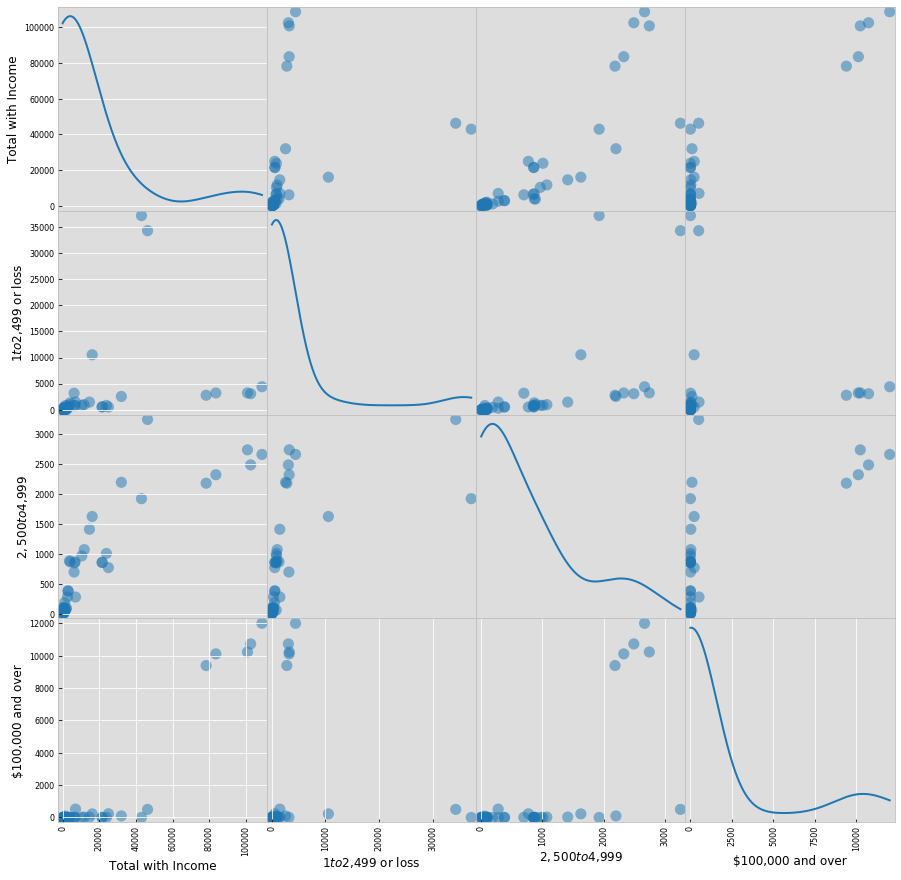

In [31]:

fig = pd.scatter_matrix(allmales['all'][[ 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999','$100,000 and over', 'Median income', 'Mean income','Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

### Figure 1: Scatter matrix. Each numerical dataframe column is plotted against each other, and the diagonal plots are the Kernel Distributions Estimates of the distribution (a smooth representation of the distribution histogram). Columns of interest are 'Total with Income',  'Median Income', 'Mean Income', 'Gini ratio', and '$2,500 to $4,999' as a single representative income bracket. 


In [32]:
# removing non real (i.e. non numerical) values from dataframes
'''
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #if some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)
                
'''


for gender in [allmales, allfemales]:
    for k in gender:
        for c in gender[k].columns :
            gender[k][c] =  pd.to_numeric(gender[k][c], errors="coerce")

# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """


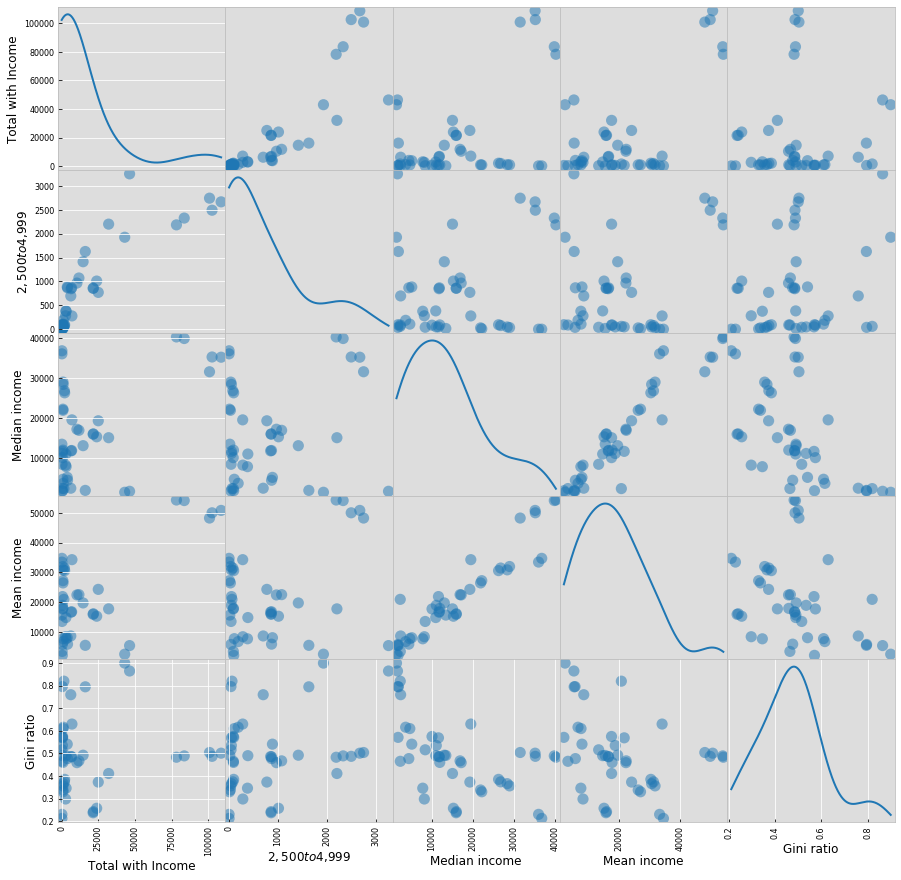

In [34]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income', 'Mean income', u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')                

### Figure 2: Scatter matrix. As Figure 1, but after data cleaning more columns can be plotted. All columns that are thought to be of possible interest, 'Total with Income', 'Median Income', 'Gini ratio', and '2,500to4,999' are now plotted. The most obvious pattern is the correlation of mean and  median income, and '2,500to4,999' income and 'Total with income'

## 3. to see how the male and female income relate to each other plot the  Median Income (from any source of revenue) of females vs the  Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

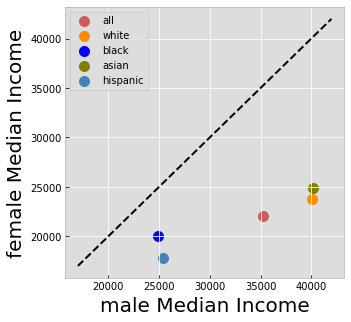

In [52]:
#plotting the Total median incame by race and
#and adding a 1-1 regression line: how things would be if the income was gender unbiased

#in the same loop: storing the values of each datapoint in 2 arrays
all_m = np.zeros(len(allmales) + 1)
all_f = np.zeros(len(allmales) + 1)

#note that I added a point at 0-0: there is a foundamental reason to state that at 
#$0 income the incame is the same. So a 0 intercept is motivated by context
    

#make sure the figure is squares, 
#so that the income equality ilke is in fact a diagonal 45deg line 
#and income equalities can be picked out by eye
pl.figure(figsize = (5,5))
for i, (k, v) in enumerate(allmales.items()):
    pl.scatter(allmales[k]['Median income'][1],
                allfemales[k]['Median income'][1],
                s=100,
                c=col[k], label=k)
    all_m[i] = allmales[k]['Median income'][1]
    all_f[i] = allfemales[k]['Median income'][1]
pl.plot([17000, 42000], [17000, 42000],'k--')
pl.xlabel('male Median Income', fontsize=20)
pl.ylabel('female Median Income', fontsize=20)
pl.legend(loc=2)



### Figure 3: Median income of (American) females is plotted against median income of males for 4 ethnic groups (see legend for details, self-reported ethnicity), and for all people. The diagonal black dashed line represents income equality: inequalities are larger at larger income. The income distributes roughly linearly in the plot, motivating the attempt to fit it with a line and using the line slope as a metric of inequality.

In [37]:
print ("male and female income:\n", all_m, all_f)

male and female income:
 [35228. 40122. 24855. 40153. 25411.     0.] [22063. 23780. 20044. 24840. 17762.     0.]


# 4. Fit the data with a line.


## method 1: greedy minimizatin of the residuals - 
what this does is, using the funcion  
```
scipy.optimize.minimize()
```
it "tries" different parameter pairs and finds the pair that makes the _residuals_ smaller

In [41]:
#pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

def line (x, pars):
    '''Creates the dependent variables of a line
    Arguments:
        x: series, independent variable
        pars: series of 2 paramters, slope and intercept
    Return:
        dependent variable array
    '''
    if not isinstance(x, numpy.ndarray) and not isinstance(x, int) \
        and not isinstance(x, float):
        print ('You must pass an array or a single number for the dependent variable')
    if not pars.shape == (2,):
        print ('You must pass a 1D series of 2 parameters in pars')
    a, b = pars
    y = a * x + b
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(pars, data, model, error=None):
    '''Calculates the residuals between model and data
    Arguments:
        data: series - 1D array of datapoints
        model: series - 1D array of model predictions
        error (optional): series - 1D array of errors on data 
    Returns:
        sum of residuals square
    '''
    residuals = (line(data, pars) - model)**2
    if error:
        residuals = residuals / error**2
    
    return residuals.sum()

p0 = (0.5,1000)

#here the model is the female income given the male income: a regression line
##important!! never work with very large numbers! always try to reduce your numbers to ~unity
result = minimize(residuals, p0, args=(all_m/1e4, all_f/1e4))
result

      fun: 0.2053162641506471
 hess_inv: array([[ 0.04362389, -0.12050972],
       [-0.12050972,  0.41625025]])
      jac: array([ 1.86264515e-09, -3.72529030e-09])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 7
     njev: 11
   status: 0
  success: True
        x: array([0.59384348, 0.16746933])

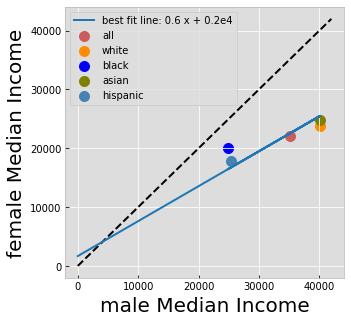

In [51]:
pl.figure(figsize = (5,5))
for i, (k, v) in enumerate(allmales.items()):
    pl.scatter(allmales[k]['Median income'][1],
                allfemales[k]['Median income'][1],
                s=100,
                c=col[k], label=k)
pl.plot([0, 42000], [0, 42000],'k--')
pl.xlabel('male Median Income', fontsize=20)
pl.ylabel('female Median Income', fontsize=20)


pl.plot(all_m, all_m * result.x[0] + result.x[1] * 1e4, label="best fit line: %.1f x + %.1fe4"\
       %(result.x[0], result.x[1]))
pl.legend(loc=2)

### Figure 4: as figure 3, but with the addition of the best line fit obtained via residuals minimization (blue solid line)

## method 2: using numpy builtin function
```
numpy.polyfit()
```
"The solution minimizes the squared error

E = \sum_{j=0}^k |p(x_j) - y_j|^2"
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html

exactly the same method under thw hood, but with a single function call

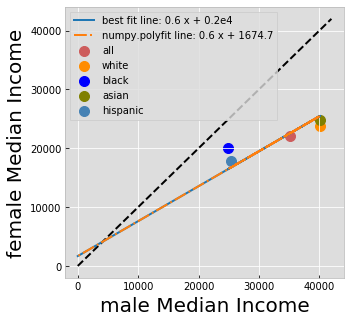

In [54]:
#also calculate the numpy polyfit line
beta1_np, beta0_np = np.polyfit(all_m, all_f, 1) 

pl.figure(figsize = (5,5))
for i, (k, v) in enumerate(allmales.items()):
    pl.scatter(allmales[k]['Median income'][1],
                allfemales[k]['Median income'][1],
                s=100,
                c=col[k], label=k)
pl.plot([0, 42000], [0, 42000],'k--')
pl.xlabel('male Median Income', fontsize=20)
pl.ylabel('female Median Income', fontsize=20)


pl.plot(all_m, all_m * result.x[0] + result.x[1] * 1e4, label="best fit line: %.1f x + %.1fe4"\
       %(result.x[0], result.x[1]))
pl.plot(all_m, all_m * beta1_np + beta0_np, '-.',
        label="numpy.polyfit line: %.1f x + %.1f"\
       %(beta1_np, beta0_np))
pl.legend(loc=2)

### Figure 5: as figure 4, but with the addition of the best line fit obtained with numpy polyfit (dotted dashed red line). Numpy polyfit is a residual minimization routine and it returns the same fit as the residual minimization function I wrote: the lines fully overlap.

## method 3: using statmodels builtin functions
```
statsmodels.regression.linear_model.OLS()
```
"A simple ordinary least squares model."
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

again: the method is the same under the hood! but statsmodels provides a lot of information about the fit


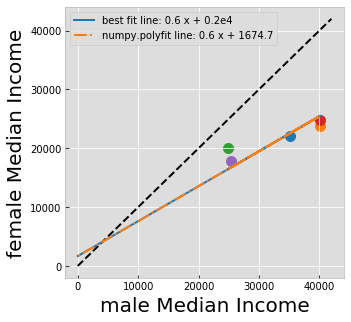

In [55]:
#also could use statsmodels
smresult = sm.OLS(all_f, sm.add_constant(all_m)).fit()
beta0_sm, beta1_sm = smresult.params

pl.figure(figsize = (5,5))
for i, (k, v) in enumerate(allmales.items()):
    pl.scatter(allmales[k]['Median income'][1],
                allfemales[k]['Median income'][1],
                s=100)
pl.plot([0, 42000], [0, 42000],'k--')
pl.xlabel('male Median Income', fontsize=20)
pl.ylabel('female Median Income', fontsize=20)


pl.plot(all_m, all_m * result.x[0] + result.x[1] * 1e4, label="best fit line: %.1f x + %.1fe4"\
       %(result.x[0], result.x[1]))
pl.plot(all_m, all_m * beta1_sm + beta0_sm, '-.',
        label="numpy.polyfit line: %.1f x + %.1f"\
       %(beta1_np, beta0_np))
pl.legend(loc=2)

### Figure 6: as figure 5, but with the statsmodels.api.OLS best line fit in place of the numpy polyfit (dotted dashed red line). Once again the solutions are fully consistent and the lines  overlap.

In [70]:
smresult.summary()

//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     78.78
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           0.000890
Time:                        09:08:49   Log-Likelihood:                -53.651
No. Observations:                   6   AIC:                             111.3
Df Residuals:                       4   BIC:                             110.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1674.6927   2066.985      0.810      0.463   -4064.179    7413.564
x1             0.5938      0.067      8.876      0.001       0.408       0.780
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.833
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.015
Skew:                           0.994   Prob(JB):                        0.602
Kurtosis:                       2.671   Cond. No.                     6.90e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## method 4 : analytical solution

the linear regression has an analytical solution, which you obtain by solving linear algebra (matrix) equations. This is closely related to the Pearson's correlation

In [61]:
# this is the analytical best regression line, with an added datapoint at through the origin. 
# one could argue for the vailidity of forcing the line through the origin. 
# In a problem like this there is no obvious best choice.
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])

#calculate the correlation coefficents assuming a 0-0 point

cor = stats.pearsonr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()

#calculate the correlation coefficents - for solution not forced through 0

cor = stats.pearsonr(all_males[1:], all_females[1:])
beta1_non0 = cor[0] * all_females[1:].std() / all_males[1:].std()
beta0_non0 = all_females[1:].mean() - beta1_non0 * all_males[1:].mean()



## and plot the line corresponding to the analytical regression to compare it with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

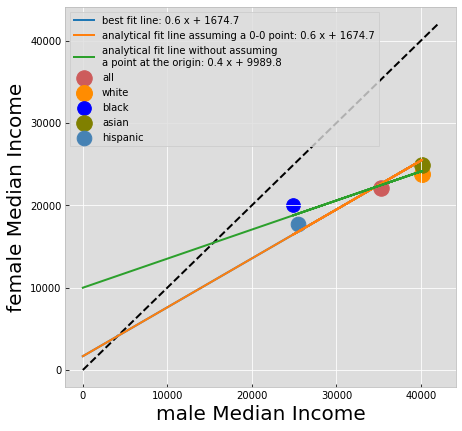

In [65]:
pl.figure(figsize = (7,7))
for i, (k, v) in enumerate(allmales.items()):
    pl.scatter(allmales[k]['Median income'][1],
                allfemales[k]['Median income'][1],
                s=150*allmales[k]['Median income'][1] / \
               allfemales[k]['Median income'][1],
                c=col[k], label=k)
pl.plot([0, 42000], [0, 42000],'k--')
pl.xlabel('male Median Income', fontsize=20)
pl.ylabel('female Median Income', fontsize=20)


pl.plot(all_m, all_m * result.x[0] + result.x[1] * 1e4, label="best fit line: %.1f x + %.1f"\
       %(result.x[0], result.x[1]*10000))
pl.plot(all_m, all_m * beta1 + beta0, label="analytical fit line assuming a 0-0 point: %.1f x + %.1f"\
       %(beta1, beta0))
pl.plot(all_m, all_m * beta1_non0 + beta0_non0, 
        label="analytical fit line without assuming \n" + "a point at the origin: %.1f x + %.1f"\
       %(beta1_non0, beta0_non0))

pl.legend(loc=2)

### Figure 7: as figure 4, but with the addition of the best line fit obtained analytically by including a point through the origin (0,0) and by not including a point through the origin. Naturally at no male income there is no female income, but in practice there should be no income below minimum wage, and minimum wage is the same for male and female. So while a point through the origin is natural the point at 0-income is an-ill defined point in this problem. Assuming a point at (0,0) or not dramatically change the fit, from a slope of 0.3 to a slope of 0.6! This is because (0,0) has a high leverage, being at the edge of the distribution and significantly below a line that fits the remaining points.

(Notice: assuming a point at (0,0) is not the same as forcing the solution through the origin!)

# 5. let's now see if all forms of income lead to a different fit. 



In [66]:
#generating arrays of all income sources
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())

all_females_allincomes = np.array(
    np.concatenate([allfemales['all']['Median income'][:].values,
                    allfemales['white']['Median income'][:].values,
                    allfemales['black']['Median income'][:].values,
                    allfemales['hispanic']['Median income'][:].values,
                    allfemales['asian']['Median income'][:].values]).flatten())

#creating a masking to remove NaN values if needed
mask = ~np.isnan(all_males_allincomes) * ~np.isnan(all_females_allincomes)


In [67]:
#I will fit it with the function I created, but any fit would be ok 
#since we show they are all consistent solutions


#initial value set to the fit for the median income
p0 = result.x
result_all = minimize(residuals, p0, args=(all_males_allincomes[mask]/1e4, 
                                       all_females_allincomes[mask]/1e4))

#initial values set to th fit of the median income not including (0,0)
#I do this to test robustness to the initial conditions
p0 = (beta0_non0, beta1_non0)

result_all_non0 = minimize(residuals, p0, args=(all_males_allincomes[mask]/1e4, 
                                       all_females_allincomes[mask]/1e4))
print (result_all, result_all_non0)


      fun: 14.497930086075936
 hess_inv: array([[ 0.0020943 , -0.00313219],
       [-0.00313219,  0.00749342]])
      jac: array([2.38418579e-07, 1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.60902051, 0.14930395])       fun: 14.497930086075948
 hess_inv: array([[ 0.002094  , -0.00313163],
       [-0.00313163,  0.00749238]])
      jac: array([-5.96046448e-07,  3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 7
     njev: 15
   status: 0
  success: True
        x: array([0.60902051, 0.14930396])


In [68]:
smresult_forced0 = sm.OLS(all_females_allincomes[mask], 
                          all_males_allincomes[mask],
                          hasconst=False).fit()
smforced0 = smresult_forced0.params


#### the results of the regression are consistent regardless of the initial guess, and they are similar to the fit to median income

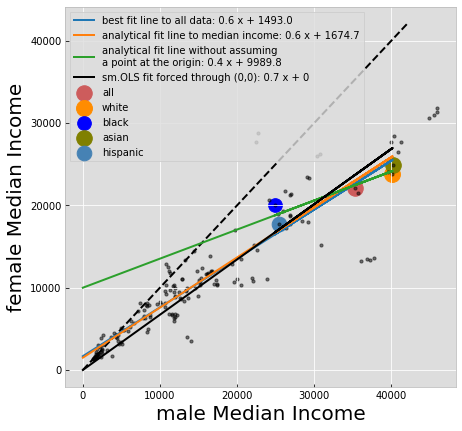

In [69]:
pl.figure(figsize = (7,7))
for i, (k, v) in enumerate(allmales.items()):
    pl.scatter(allmales[k]['Median income'][1],
                allfemales[k]['Median income'][1],
                s=150*allmales[k]['Median income'][1] / \
               allfemales[k]['Median income'][1],
                c=col[k], label=k)
    
pl.scatter(all_males_allincomes[mask], all_females_allincomes[mask], s=10, 
           color = 'k', alpha = 0.5)
pl.plot([0, 42000], [0, 42000],'k--')
pl.xlabel('male Median Income', fontsize=20)
pl.ylabel('female Median Income', fontsize=20)



pl.plot(all_m, all_m * result.x[0] + result.x[1] * 1e4, 
        label="best fit line to all data: " + 
        "%.1f x + %.1f"\
       %(result_all.x[0], result_all.x[1]*10000))
pl.plot(all_m, all_m * result_all.x[0] + result_all.x[1] * 1e4, 
        label="analytical fit line to median income: " + 
        "%.1f x + %.1f"\
       %(beta1, beta0))
pl.plot(all_m, all_m * beta1_non0 + beta0_non0, 
        label="analytical fit line without assuming \n" + "a point at the origin: %.1f x + %.1f"\
       %(beta1_non0, beta0_non0))

pl.plot(all_m, all_m * smforced0 , 'k-',
        label="sm.OLS fit forced through (0,0): %.1f x + 0"\
       %(smforced0))

pl.legend(loc=2)

### Figure 8: as figure 4, but with the income from all sources, plotted as black dots, and the fit line to all income sources, in addition to the best line fit obtained analytically, and by forcing the line to pass through the origin (with statsmodels.api.OLS, solid black line). 
### The fit to all data is consistent with the fit to the median income by ethnicity, and not with the median income fit obtained without assuming the (0,0) point to the median income. 
### The data shows more scatter at high income, with leverage points just below 40,000. Statsmodels can produce leverage point plots

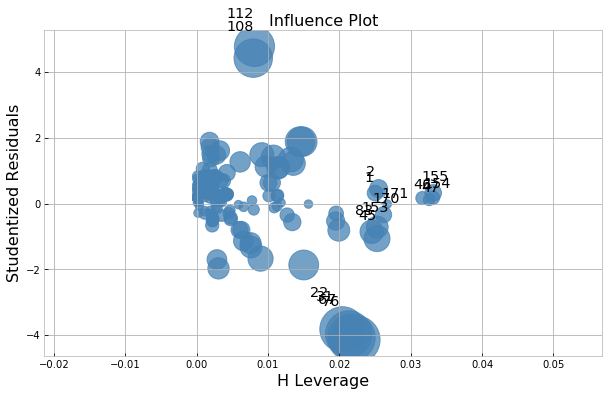

In [21]:
ax = pl.figure(figsize = (10,6)).add_subplot(111)
fig = sm.graphics.influence_plot(smresult_forced0, ax=ax)


### Figure 9: influence plot: the top right of the region is occupeied by plonts with high residual and high leverag: high influence. The three highest influence points are printed below
  

In [22]:
high_influence = [154, 155, 46, 47]
for hip in high_influence:
    print ("high influence point: ", all_males_allincomes[mask][hip], 
          all_females_allincomes[mask][hip])

high influence point:  45926.0 31363.0
high influence point:  45950.0 31802.0
high influence point:  44882.0 30626.0
high influence point:  45554.0 30919.0


## Now pick a stipend, maybe your ideal stipend? 
## and predict what a woman in a position where a man recieves your ideal stipend would make



In [24]:
# my ideal stipend is $175,000
# in a job position where a man makes $175,000 I would make
ideal = 175000.
print ("In a job position where a man makes $175000 I would make $%d"%(
        result_all.x[0] * ideal +  result_all.x[1] * 10000))
print ("A man in a job position where I would make $175000 " + 
       "would make $%d"%(
        (ideal - result_all.x[1] * 10000) / result_all.x[0]))

In a job position where a man makes $175000 I would make $108071
A man in a job position where I would make $175000 would make $284895


## lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

Initially we used the data separated by ethnicity, and if ta line to those. There may be differences in gender income inequality for different races, which would bias our first line fit, as well as difference in gender income inequality at different income brackets, and the income is not evenly distributes by ethnicity (as obvious in the median income data we used in the frst several fits). 
Using all income and all kinds of revenue suppresses those biases, but an analysis of the income disparity for different ethnic groups should be carried on by separating the ethnic groups and using all income sources for each ethnic group.

This still would not be sufficient to separate the effects of race on income inequality, and the effects of being in different income brackets on income inequality, since race and income are covariant.
